**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import KFold, train_test_split

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm = 'brute', metric = 'minkowski'):
        self.n = n_neighbors
        self.alg = algorithm
        self.metr = metric
    
    def fit(self, X, y):
        self.x = X
        self.y = y
        self.classes = y.max()
        if(self.alg == 'kd_tree'):
            self.close = KDTree(X, leaf_size = 10)

    
    def predict(self, X):
        if(self.alg == 'brute'):
            ind = cdist(X, self.x, self.metr).argsort(axis = 1)[:,:self.n]
        if(self.alg == 'kd_tree'):
            dist, ind = self.close.query(X, k = self.n) 
        vote = np.zeros((X.shape[0], self.classes + 1)) 
        for i in range(X.shape[0]):
            vote[i] = np.array(np.bincount(self.y[ind[i]], minlength = self.classes + 1))
        result = vote.argmax(axis = 1)
        return result

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.15 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 78 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 4.12 ms


array([2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 15.6 ms, sys: 31.2 ms, total: 46.9 ms
Wall time: 1.85 ms


array([2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [16]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.61 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [17]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 370 µs


In [18]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.9 ms


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 15.6 ms, total: 15.6 ms
Wall time: 1.79 ms


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [21]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [22]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [32]:
vectorizer = CountVectorizer(min_df=0.02, max_df=0.1, stop_words='english')
vectorizer.fit(data)
X_t = vectorizer.transform(data).toarray()
y_t = target

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [25]:
res1 = []
clf = MyKNeighborsClassifier(n_neighbors = 2, algorithm ='brute')

rkf = KFold(n_splits=3)
for train_index, test_index in rkf.split(X_t):
    X_train, X_test = X_t[train_index], X_t[test_index]
    y_train, y_test = y_t[train_index], y_t[test_index]
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    res1.append(accuracy_score(y_test, clf_pred))

In [26]:
res1

[0.15402969247083775, 0.14160700079554495, 0.14956245027844073]

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [27]:
def best_n(X, y , metric = 'euclidean'):
    res = []
    
    for k in range(1,11):
        
        if (metric == 'cosine'):
            clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute',metric = 'cosine')
        else:
            clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute')
        
        rkf = KFold(n_splits=3)
        for train_index, test_index in rkf.split(X):
            res1= []
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train, y_train)
            clf_pred = clf.predict(X_test)
            res1.append(accuracy_score(y_test, clf_pred))
        res.append(np.asarray(res1).mean())
    return res

In [28]:
score1 = best_n(X_t,y_t)
score2 = best_n(X_t, y_t, metric = 'cosine')

In [33]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.02, max_df=0.1, stop_words='english')
tfidf_vectorizer.fit(data)
X_t1 = tfidf_vectorizer.transform(data).toarray()

In [30]:
score3 = best_n(X_t1, y_t)
score4 = best_n(X_t1, y_t, metric = 'cosine')

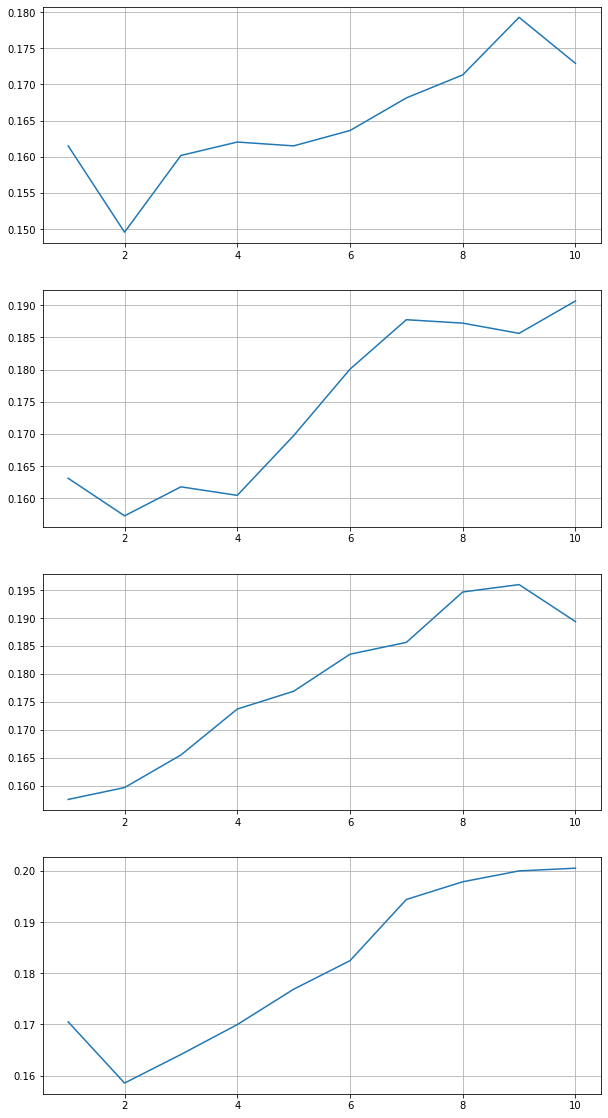

In [31]:
fig = plt.figure(figsize= (10, 20))

ax1 = fig.add_subplot(411)
ax1.grid()
ax1.plot(range(1, 11), score1)

ax2 = fig.add_subplot(412)
ax2.plot(range(1, 11), score2)
ax2.grid()

ax3 = fig.add_subplot(413)
ax3.plot(range(1, 11), score3)
ax3.grid()
    
ax4 = fig.add_subplot(414)
ax4.plot(range(1, 11), score4)
ax4.grid()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [34]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [35]:
X_test = tfidf_vectorizer.transform(newsgroups['data']).toarray()

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [36]:
clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute',metric = 'cosine')
clf.fit(X_t1, y_t)
clf_pred = clf.predict(X_test)
accuracy_score(newsgroups['target'], clf_pred)

0.29235262878385554